In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.utils import *
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values

C:\Users\Lenova\Desktop\ML_Assignment_1
C:\Users\Lenova\Desktop\ML_Assignment_1


In [4]:
def get_binary_data(N,M):
    X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(M)})
    y = pd.Series(np.random.randint(P, size=N), dtype="category")

In [5]:
def get_datasets(N,M,ip:str,op:str):
    if ip=='d':
        P=6
        X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(M)})
    if ip=='r':
        X = pd.DataFrame(np.random.randn(N, M))
        
    if op=='r':
        y = pd.Series(np.random.randn(N))
    if op=='d':
        P=6
        y = pd.Series(np.random.randint(P, size=N), dtype="category")
        
    return X,y

In [6]:
def get_times(dec_tree,X_train,y_train,X_test):
    fit_t1=time.time()
    dec_tree.fit(X_train,y_train)
    fit_t2=time.time()
    
    pred_t1=time.time()
    y_pred=dec_tree.predict(X_test)
    pred_t2=time.time()
    
    fit_time=fit_t2-fit_t1
    pred_time=pred_t2-pred_t1
    
    return fit_time,pred_time

In [7]:
def get_avg_time(dec_tree,N,M,ip,op,num_average_time):
    t_fit_list=[]
    t_pred_list=[]
    for num in range(num_average_time):
        X_train,y_train=get_datasets(N,M,ip,op)
        X_test,_=get_datasets(N,M,ip,op)
        t_fit,t_pred=get_times(dec_tree,X_train,y_train,X_test)
        t_fit_list.append(t_fit)
        t_pred_list.append(t_pred)
    avg_fit_time=np.mean(t_fit_list)
    avg_pred_time=np.mean(t_pred_list)
    
    return avg_fit_time,avg_pred_time

In [8]:
def plot_times(N,M,fit_times,pred_times):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    for j, m in enumerate(M):
        plt.plot(N, fit_times[:, j], label=f'Feature-{m}')
    plt.title("Fit Time vs No. of Samples for different no. of Features")
    plt.xlabel("N (Number of Samples)")
    plt.ylabel("Fit Time (seconds)")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for j, m in enumerate(M):
        plt.plot(N, pred_times[:, j], label=f'Feature-{m}')
    plt.title("Predict Time vs No. of Samples for different no. of Features")
    plt.xlabel("N (Number of Samples)")
    plt.ylabel("Predict Time (seconds)")
    plt.legend()
    plt.show()

In [11]:
N=[20,25,30,35]
M=[2,3,4]

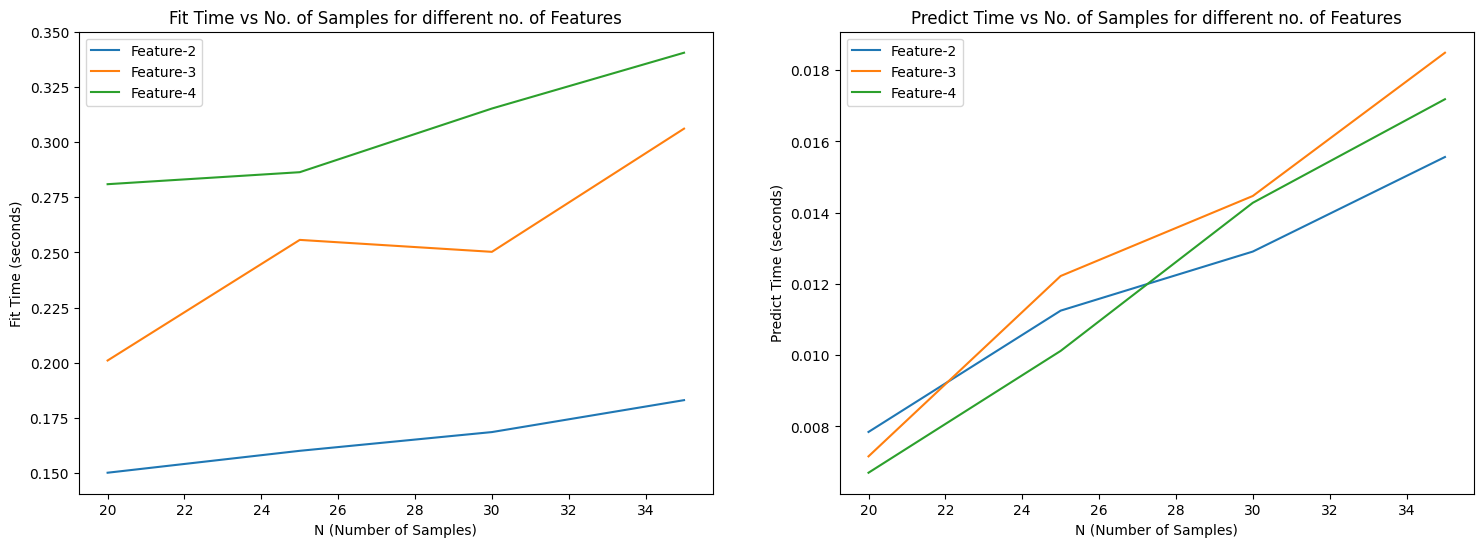

In [12]:
fit_times_bin = np.zeros((len(N), len(M)))
pred_times_bin = np.zeros((len(N), len(M)))
for i,n in enumerate(N):
    for j,m in enumerate(M):
        dec_tree=DecisionTree(criterion='gini_index')
        avg_fit_time,avg_pred_time=get_avg_time(dec_tree,n,m,'d','d',num_average_time)
        fit_times_bin[i,j]=avg_fit_time
        pred_times_bin[i,j]=avg_pred_time
plot_times(N,M,fit_times_bin,pred_times_bin)

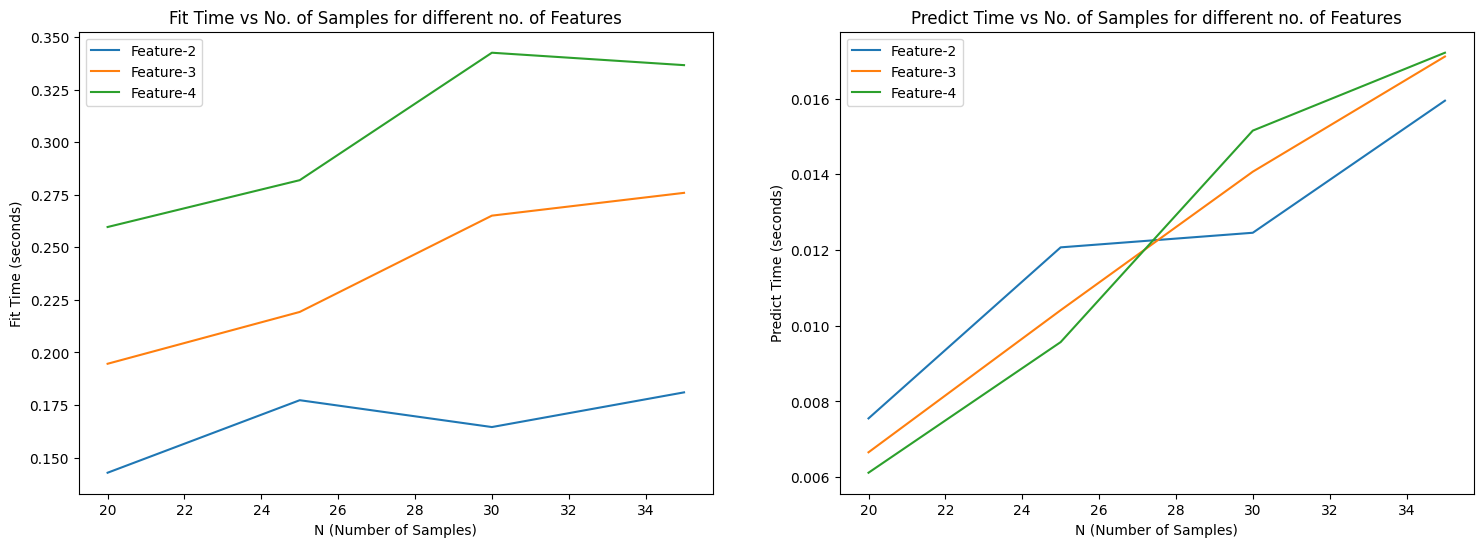

In [13]:
# Discrete input Discrete Output:
fit_times_dd = np.zeros((len(N), len(M)))
pred_times_dd = np.zeros((len(N), len(M)))
for i,n in enumerate(N):
    for j,m in enumerate(M):
        dec_tree=DecisionTree(criterion='gini_index')
        avg_fit_time,avg_pred_time=get_avg_time(dec_tree,n,m,'d','d',num_average_time)
        fit_times_dd[i,j]=avg_fit_time
        pred_times_dd[i,j]=avg_pred_time
plot_times(N,M,fit_times_dd,pred_times_dd)

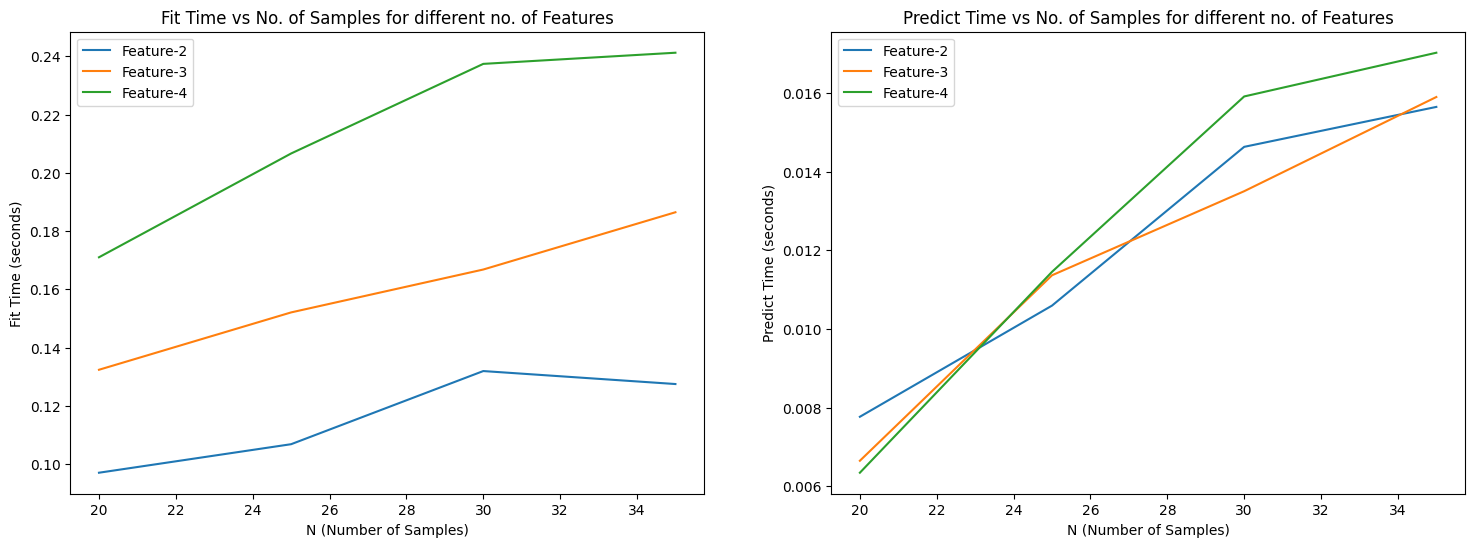

In [14]:
# Discrete input Real Output:
fit_times_dr = np.zeros((len(N), len(M)))
pred_times_dr = np.zeros((len(N), len(M)))
for i,n in enumerate(N):
    for j,m in enumerate(M):
        dec_tree=DecisionTree(criterion='mse')
        avg_fit_time,avg_pred_time=get_avg_time(dec_tree,n,m,'d','r',num_average_time)
        fit_times_dr[i,j]=avg_fit_time
        pred_times_dr[i,j]=avg_pred_time
plot_times(N,M,fit_times_dr,pred_times_dr)

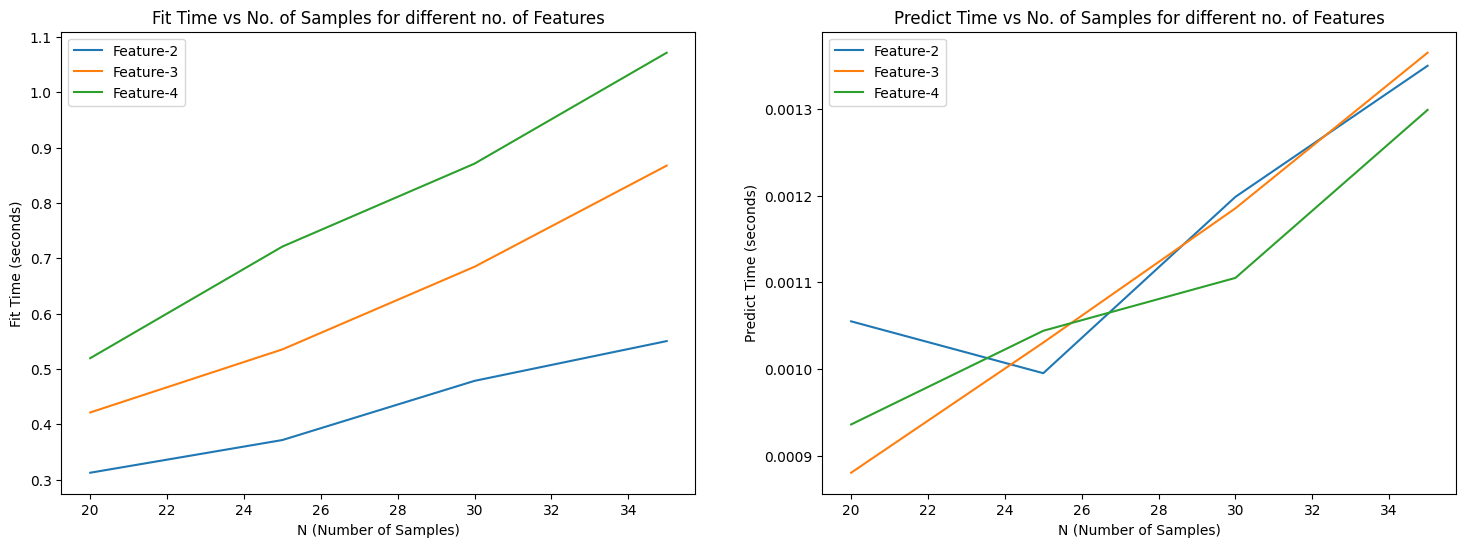

In [15]:
# Real input Discrete Output:
fit_times_rd = np.zeros((len(N), len(M)))
pred_times_rd = np.zeros((len(N), len(M)))
for i,n in enumerate(N):
    for j,m in enumerate(M):
        dec_tree=DecisionTree(criterion='gini_index')
        avg_fit_time,avg_pred_time=get_avg_time(dec_tree,n,m,'r','d',num_average_time)
        fit_times_rd[i,j]=avg_fit_time
        pred_times_rd[i,j]=avg_pred_time
plot_times(N,M,fit_times_rd,pred_times_rd)

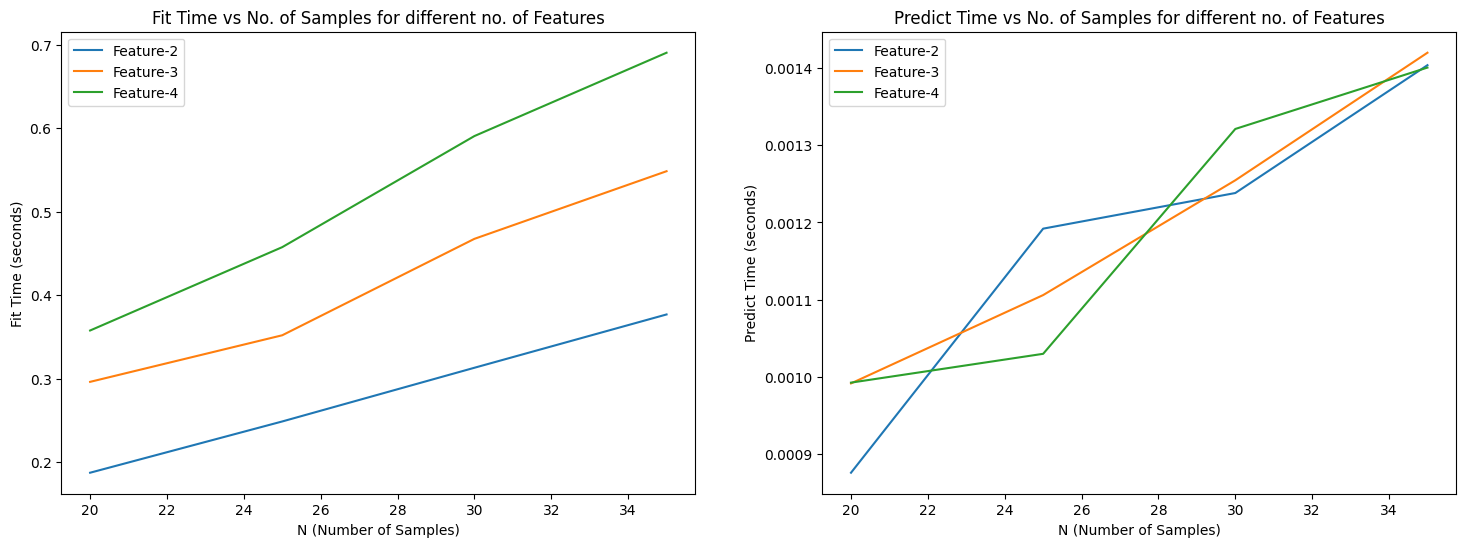

In [16]:
# Real input Real Output:
fit_times_rr = np.zeros((len(N), len(M)))
pred_times_rr = np.zeros((len(N), len(M)))
for i,n in enumerate(N):
    for j,m in enumerate(M):
        dec_tree=DecisionTree(criterion='mse')
        avg_fit_time,avg_pred_time=get_avg_time(dec_tree,n,m,'r','r',num_average_time)
        fit_times_rr[i,j]=avg_fit_time
        pred_times_rr[i,j]=avg_pred_time
plot_times(N,M,fit_times_rr,pred_times_rr)

### Theoretically, while training a decision tree, for each feature the tree repeatedly splits the record values based on split value. There are N records. So for each feature training time complexity is O(N*logN). There are M feature, so the total training time complexity is O(M*N*logN), theoretically. Also the theoretical predicting complexity is O(N*D) for maximum depth D, as we keep on comparing each of N rows with values until we reach from root to leaf.     
### Practically, we see that fit-times have nearly  logarithmic dependencies on number of samples N (only upto an extent), while we see it increases evenly with increase in no. of features M, for given N. This aligns with theoretical assertions by little. Prediction times increase almost linearly with time as well while being very close to each other for different M, aligning with independence of theoretical complexity from M. However they show some skewness which might account for the inefficiency of model